<a href="https://colab.research.google.com/github/Mktapphub/Edge-project/blob/main/Edge_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Average Scores by Subject:
Subject
Children               80.0
Children-Literature    47.5
Drama                  40.0
Fiction                52.5
Poetry                 59.5
Name: Score, dtype: float64

Low Attendance (<75%):
  Student Name Student ID              Subject  Score  Attendance (%)  \
1       Minhaj   STU-1001             Children     80              40   
2          Mim   STU-1002               Poetry     79              60   
3          Mim   STU-1002               Poetry     40              50   
5        Afnan   STU-1003              Fiction     45              40   
6      Sumaiya   STU-1004  Children-Literature     55              70   

  Assignment Completion       Date Grade  
1                    No 2023-11-17     B  
2                   Yes 2023-06-04     B  
3                    No 2023-07-19  Fail  
5                    No 2023-02-08  Fail  
6                   Yes 2023-07-08     C  

Students with Missing Assignments:
  Student Name Student ID              S

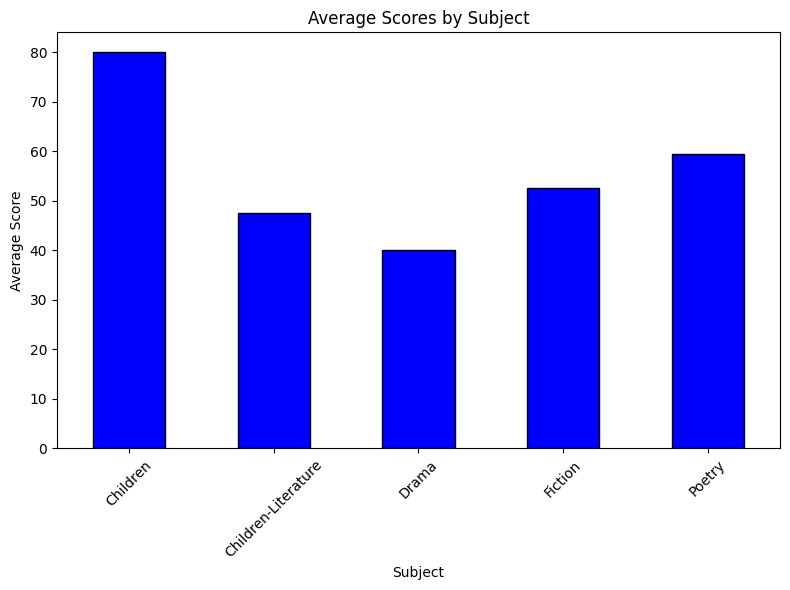

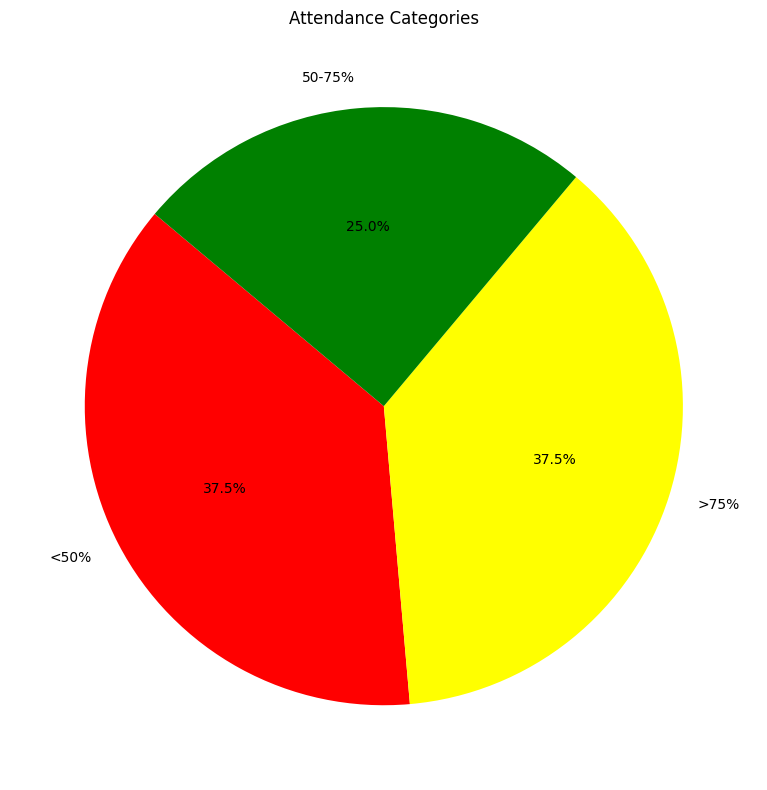

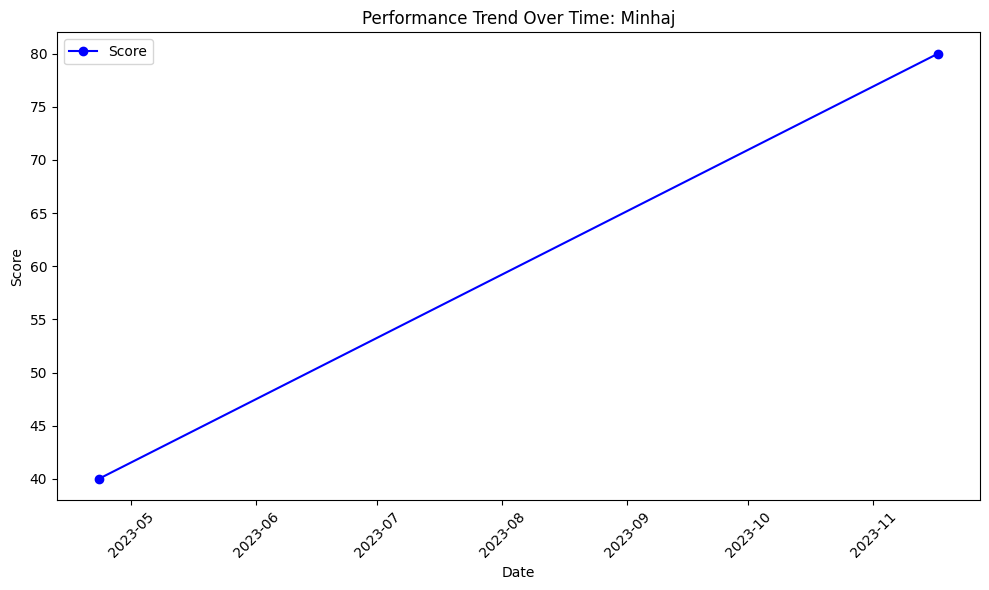


 [ Interactive Menu ]
1. Add a new student
2. Search for a student
3. Update student data
4. Filter students failing a subject
5. Exit
Enter your choice: 2
Enter student ID to search: STU-1005


Student not found!

 [ Interactive Menu ]
1. Add a new student
2. Search for a student
3. Update student data
4. Filter students failing a subject
5. Exit
Enter your choice: STU-1004


ERROR:root:Invalid menu choice.


Invalid choice! Try again.

 [ Interactive Menu ]
1. Add a new student
2. Search for a student
3. Update student data
4. Filter students failing a subject
5. Exit
Enter your choice: 2
Enter student ID to search: STU-1001
  Student Name Student ID   Subject  Score  Attendance (%)  \
0       Minhaj   STU-1001     Drama     40              90   
1       Minhaj   STU-1001  Children     80              40   

  Assignment Completion       Date Grade  
0                   Yes 2023-04-23  Fail  
1                    No 2023-11-17     B  

 [ Interactive Menu ]
1. Add a new student
2. Search for a student
3. Update student data
4. Filter students failing a subject
5. Exit
Enter your choice: 5
Data saved. Exiting...


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import os
from datetime import datetime, timedelta
import random
import logging

# Using decorators keep logs
logging.basicConfig(
    filename='execution.log',
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)
# 1. Data Collection and Storage
data = {
    "Student Name": ["Minhaj", "Minhaj", "Mim", "Mim", "Afnan", "Afnan", "Sumaiya", "Sumaiya"],
    "Student ID": ["STU-1001", "STU-1001", "STU-1002", "STU-1002", "STU-1003", "STU-1003", "STU-1004", "STU-1004"],
    "Subject": ["Drama", "Children", "Poetry", "Poetry", "Fiction", "Fiction", "Children-Literature",
                "Children-Literature"],
    "Score": [40, 80, 79, 40, 60, 45, 55, 40],
    "Attendance (%)": [90, 40, 60, 50, 80, 40, 70, 90],
    "Assignment Completion": ["Yes", "No", "Yes", "No", "Yes", "No", "Yes", "No"]
}
# using dataframe to create a csv file. Here index = false to create output without index.
csv = "student_data.csv"
df = pd.DataFrame(data)
df.to_csv(csv, index=False)


def add_dates(df):
    logging.info("Running add_dates function.")
    start_date = datetime(2023, 1, 1)
    df["Date"] = [start_date + timedelta(days=random.randint(0, 365)) for _ in range(len(df))]
    return df


# uses of decorators
def load_data(filename):
    logging.info("Running load_data function.")
    if not os.path.exists(filename):
        logging.error(f"File {filename} not found!")
        print(f"Error: File {filename} not found!")
        return None
    return pd.read_csv(filename)


# log
def save_data(filename, data):
    logging.info("Running save_data function.")
    data.to_csv(filename, index=False)


def analyze_data(df):
    logging.info("Running analyze_data function.")
    df["Score"] = pd.to_numeric(df["Score"], errors='coerce')
    average_scores = df.groupby("Subject")["Score"].mean()
    min_scores = df.groupby("Subject")["Score"].min()
    max_scores = df.groupby("Subject")["Score"].max()
    low_attendance = df[df["Attendance (%)"] < 75]  # Boolean Indexing
    missing_assignments = df[df["Assignment Completion"] == "No"]

    print("Average Scores by Subject:")
    print(average_scores)
    print("\nLow Attendance (<75%):")
    print(low_attendance)
    print("\nStudents with Missing Assignments:")
    print(missing_assignments)


def graph_average_scores(df):
    logging.info("Running graph_average_scores function.")
    average_scores = df.groupby("Subject")["Score"].mean()
    average_scores.plot(kind="bar", color="blue", edgecolor="black", figsize=(8, 6))
    plt.title("Average Scores by Subject")  # Matplotlib
    plt.xlabel("Subject")
    plt.ylabel("Average Score")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


def graph_attendance(df):
    logging.info("Running plot_attendance function.")
    attendance = pd.cut(df["Attendance (%)"], bins=[0, 50, 75, 100], labels=["<50%", "50-75%", ">75%"])
    attendance_counts = attendance.value_counts()
    attendance_counts.plot(kind="pie", autopct='%1.1f%%', startangle=140, figsize=(8, 8),
                           colors=["red", "yellow", "green"])
    plt.title("Attendance Categories")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()


def graph_performance_trend(df, student_name):
    logging.info(f"Running plot_performance_trend function for student: {student_name}.")
    student_data = df[df["Student Name"] == student_name]
    if student_data.empty:
        logging.warning(f"No data available for {student_name}.")
        print(f"No data available for {student_name}.")
        return

    student_data = student_data.sort_values(by="Date")
    plt.figure(figsize=(10, 6))
    plt.plot(student_data["Date"], student_data["Score"], marker="o", linestyle="-", color="blue", label="Score")
    plt.title(f"Performance Trend Over Time: {student_name}")
    plt.xlabel("Date")
    plt.ylabel("Score")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


def calculate_grade(score):
    logging.info("Running calculate_grade function.")
    if score >= 85:
        return "A"
    elif score >= 70:
        return "B"
    elif score >= 50:
        return "C"
    else:
        return "Fail"


def filter_students_failing(df, subject, passing_score=50):
    logging.info(f"Running filter_students_failing_subject function for subject: {subject}.")
    failing_students = df[(df["Subject"] == subject) & (df["Score"] < passing_score)]
    print(f"\nStudents Failing in {subject}:")
    print(failing_students)
    return failing_students


def interactive_menu(df):
    logging.info("Running interactive_menu function.")
    while True:
        print("\n [ Interactive Menu ]")
        print("1. Add a new student")
        print("2. Search for a student")
        print("3. Update student data")
        print("4. Filter students failing a subject")
        print("5. Exit")
        choice = input("Enter your choice: ")

        if choice == "1":
            name = input("Enter student name: ")
            student_id = input("Enter student ID: ")
            while not re.fullmatch(r"STU-\d{4}", student_id):  # Regex
                logging.warning("Invalid student ID format.")
                print("Invalid ID format! Use 'STU-XXXX'")
                student_id = input("Enter student ID: ")
            subject = input("Enter subject: ")
            score = int(input("Enter score: "))
            attendance = int(input("Enter attendance (%): "))
            assignment = input("Assignment completed? (Yes/No): ")
            new_data = {"Student Name": name, "Student ID": student_id, "Subject": subject,
                        "Score": score, "Attendance (%)": attendance, "Assignment Completion": assignment}
            df = df._append(new_data, ignore_index=True)
            df =pd.DataFrame(df)
            save_data(csv, df)
            logging.info("New student data added.")
            print("Student data added successfully!")

        elif choice == "2":
            search_id = input("Enter student ID to search: ")
            result = df[df["Student ID"] == search_id]
            if not result.empty:
                print(result)
            else:
                logging.warning(f"Student ID {search_id} not found.")
                print("Student not found!")

        elif choice == "3":
            update_id = input("Enter student ID to update: ")
            result = df[df["Student ID"] == update_id]
            if not result.empty:
                new_score = int(input("Enter new score: "))
                new_attendance = int(input("Enter new attendance (%): "))
                df.loc[df["Student ID"] == update_id, ["Score", "Attendance (%)"]] = [new_score, new_attendance]
            else:
                logging.warning(f"Student ID {update_id} not found.")
                print("Student not found!")

        elif choice == "4":
            subject = input("Enter the subject to filter failing students: ")
            filter_students_failing(df, subject)

        elif choice == "5":
            save_data(csv, df)
            logging.info("Exiting the interactive menu and saving data.")
            print("Data saved. Exiting...")
            break

        else:
            logging.error("Invalid menu choice.")
            print("Invalid choice! Try again.")


def main():
    logging.info("Running main function.")
    df = load_data(csv)
    if df is not None:
        df = add_dates(df)
        df["Grade"] = df["Score"].apply(calculate_grade)
        analyze_data(df)
        graph_average_scores(df)
        graph_attendance(df)
        graph_performance_trend(df, "Minhaj")
        interactive_menu(df)


if __name__ == "__main__":
    main()
